# EDA : Analyse Exploratoire des données


## Imports

In [50]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
import os
import json


## Meta Dataset Loading
Chargement du dataset

In [2]:
TACO_DATASET_ROOT_PATH = r"N:\My Drive\KESKIA Drive Mlamali\datasets\taco-2gb"

taco_meta_df = pd.read_csv(f'{TACO_DATASET_ROOT_PATH}/meta_df.csv')
print(f"shape : {taco_meta_df.shape}")
taco_meta_df

shape : (4784, 13)


,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0000,127.0000,447.0000,1322.0,4.039540e+05
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0000,457.0000,1429.0000,1519.0,1.071260e+06
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0000,292.0000,1006.0000,672.0,9.958350e+04
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0000,987.0000,500.0000,374.0,7.383250e+04
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0000,989.0000,44.0000,51.0,9.150000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,1498,1824,4000,batch_9/000098.jpg,16,Drink carton,Carton,4779,228.7143,1550.0476,1007.9999,579.0,5.032469e+05
4780,1498,1824,4000,batch_9/000098.jpg,7,Plastic bottle cap,Bottle cap,4780,1041.3334,1721.7142,141.0000,138.0,1.449450e+04
4781,1499,1824,4000,batch_9/000099.jpg,39,Other plastic wrapper,Plastic bag & wrapper,4781,862.0274,1331.2500,505.9726,612.5,1.549541e+05
4782,1499,1824,4000,batch_9/000099.jpg,14,Other carton,Carton,4782,966.0000,1996.0000,211.0000,336.0,2.867500e+04


### Fuse annotations data with meta_df

In [3]:
annotation_path = f'{TACO_DATASET_ROOT_PATH}/data/annotations.json'
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

print(f"keys : {annotations.keys()}")
annotations_dfs_dict = {k : pd.json_normalize(v) for k, v in annotations.items()}

keys : dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])


In [4]:
annotations_dfs_dict["scene_categories"]

,id,name
0,0,Clean
1,1,"Indoor, Man-made"
2,2,Pavement
3,3,"Sand, Dirt, Pebbles"
4,4,Trash
5,5,Vegetation
6,6,Water


In [5]:
# rename columns image_id -> img_id
annotations_dfs_dict["scene_annotations"].rename(columns={"image_id": "img_id"}, inplace=True)
annotations_dfs_dict["scene_annotations"]

,img_id,background_ids
0,0,[1]
1,1,[1]
2,2,[2]
3,3,[5]
4,4,[5]
...,...,...
4291,1495,"[5, 3]"
4292,1496,"[5, 3]"
4293,1497,[2]
4294,1498,[2]


In [6]:
# join on "img_id"
pd.merge(taco_meta_df, annotations_dfs_dict["scene_annotations"], on="img_id", how="left")

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area,background_ids
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0000,127.00,447.0000,1322.0,4.039540e+05,[1]
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0000,457.00,1429.0000,1519.0,1.071260e+06,[1]
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0000,292.00,1006.0000,672.0,9.958350e+04,[1]
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0000,987.00,500.0000,374.0,7.383250e+04,[2]
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0000,989.00,44.0000,51.0,9.150000e+02,[2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13490,1499,1824,4000,batch_9/000099.jpg,39,Other plastic wrapper,Plastic bag & wrapper,4781,862.0274,1331.25,505.9726,612.5,1.549541e+05,[5]
13491,1499,1824,4000,batch_9/000099.jpg,14,Other carton,Carton,4782,966.0000,1996.00,211.0000,336.0,2.867500e+04,[2]
13492,1499,1824,4000,batch_9/000099.jpg,14,Other carton,Carton,4782,966.0000,1996.00,211.0000,336.0,2.867500e+04,[5]
13493,1499,1824,4000,batch_9/000099.jpg,6,Glass bottle,Bottle,4783,1125.0000,1858.00,234.0000,510.0,6.858950e+04,[2]


## Columns Overview

In [7]:
taco_meta_df.columns

Index(['img_id', 'img_width', 'img_height', 'img_file', 'cat_id', 'cat_name',
       'supercategory', 'ann_id', 'x', 'y', 'width', 'height', 'area'],
      dtype='object')

In [8]:
taco_meta_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784 entries, 0 to 4783
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   img_id         4784 non-null   int64  
 1   img_width      4784 non-null   int64  
 2   img_height     4784 non-null   int64  
 3   img_file       4784 non-null   object 
 4   cat_id         4784 non-null   int64  
 5   cat_name       4784 non-null   object 
 6   supercategory  4784 non-null   object 
 7   ann_id         4784 non-null   int64  
 8   x              4784 non-null   float64
 9   y              4784 non-null   float64
 10  width          4784 non-null   float64
 11  height         4784 non-null   float64
 12  area           4784 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 486.0+ KB


## Descriptives Stats

In [9]:
taco_meta_df.describe().T

,count,mean,std,min,25%,50%,75%,max
img_id,4784.0,756.936037,445.884396,0.000000,354.75,743.00,1154.000,1499.0
img_width,4784.0,2794.278428,714.851079,842.000000,2448.00,2448.00,3264.000,6000.0
img_height,4784.0,3234.358278,837.244672,474.000000,2448.00,3264.00,4000.000,5312.0
cat_id,4784.0,34.079013,20.081707,0.000000,12.00,36.00,57.000,59.0
ann_id,4784.0,2391.949833,1381.264283,1.000000,1195.75,2392.50,3588.250,4783.0
x,4784.0,1232.285117,703.739763,-1.000000,741.60,1150.00,1612.000,5573.0
y,4784.0,1485.067894,826.005410,-1.316667,892.75,1414.00,1961.250,5208.0
width,4784.0,331.434419,440.431739,10.000000,68.00,179.50,405.250,3758.0
height,4784.0,320.246833,442.046602,4.000000,62.00,159.00,387.000,3995.0
area,4784.0,150407.154132,485084.750277,55.500000,2142.00,14244.75,75333.125,7328035.5


## Cleaning

### Missing Values
Vérification si présence des valeurs manquantes

<Axes: title={'center': 'Missing Values'}>

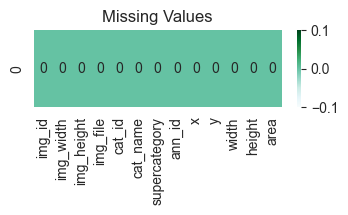

In [10]:
#Valeurs nulles
fig, ax = plt.subplots(figsize=(4, 1))
plt.title('Missing Values')
nans = taco_meta_df.isna().sum().sort_values(ascending=False).to_frame().T
sns.heatmap(nans, annot=True, fmt='d', cmap='BuGn')

Remarque : Il n'y a pas de valeurs manquantes

### Duplicates

In [11]:
taco_meta_df.duplicated().sum()

0

In [12]:
subset = ['cat_name', 'supercategory', 'x', 'y', 'width', 'height', 'area']
taco_meta_df.duplicated(subset=subset).sum()

0

Remarque : Il n'y a pas de valeurs dupliquées.

## Images

In [13]:
# img_id unique count
print(f"{taco_meta_df['img_file'].nunique()} uniques images")

1500 uniques images


In [14]:
print(f"{taco_meta_df['img_id'].nunique()} uniques img_id")

1500 uniques img_id


## Class 

### Class "cat_name" Distribution

In [15]:
n_cat_name = taco_meta_df['cat_name'].nunique()
print(f"{n_cat_name} unique cat_name")
taco_meta_df['cat_name'].unique().tolist()

59 unique cat_name


['Glass bottle',
 'Meal carton',
 'Other carton',
 'Clear plastic bottle',
 'Plastic bottle cap',
 'Drink can',
 'Food Can',
 'Other plastic bottle',
 'Pop tab',
 'Aerosol',
 'Glass cup',
 'Other plastic wrapper',
 'Styrofoam piece',
 'Plastic film',
 'Other plastic',
 'Drink carton',
 'Metal bottle cap',
 'Disposable food container',
 'Normal paper',
 'Paper cup',
 'Cigarette',
 'Single-use carrier bag',
 'Tissues',
 'Toilet tube',
 'Crisp packet',
 'Plastic lid',
 'Metal lid',
 'Egg carton',
 'Plastic straw',
 'Paper bag',
 'Disposable plastic cup',
 'Broken glass',
 'Plastic utensils',
 'Glass jar',
 'Food waste',
 'Squeezable tube',
 'Spread tub',
 'Shoe',
 'Garbage bag',
 'Aluminium foil',
 'Six pack rings',
 'Foam cup',
 'Paper straw',
 'Corrugated carton',
 'Unlabeled litter',
 'Aluminium blister pack',
 'Battery',
 'Rope & strings',
 'Other plastic container',
 'Polypropylene bag',
 'Scrap metal',
 'Magazine paper',
 'Pizza box',
 'Plastic glooves',
 'Wrapping paper',
 'Carded 

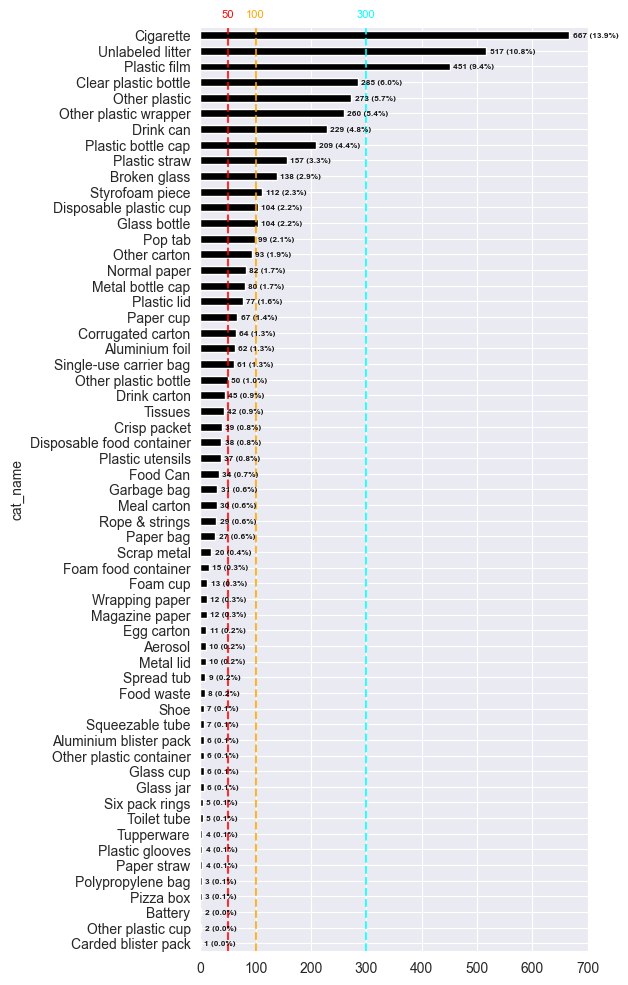

In [16]:
fig, ax = plt.subplots(figsize=(5, 12))
cat_name_counts = taco_meta_df['cat_name'].value_counts(ascending=True)

#print(cat_name_counts / cat_name_counts.sum() * 100)
cat_name_counts.plot(kind='barh', ax=ax, color='black')
# add % to the plot
for i, v in enumerate(cat_name_counts):
    ax.text(v + 6, i - 0.15, f"{v} ({v / cat_name_counts.sum():.1%})", color='black', fontweight='bold', fontsize=6,
            alpha=0.9)

for xc, color in zip([50, 100, 300], ['r', 'orange', 'cyan']):
    ax.text(xc, n_cat_name, str(xc), fontsize=8, color=color, va="bottom", ha="center")
    plt.axvline(x=xc, color=color, linestyle='--', alpha=0.8)

plt.show()

In [17]:
# display cat_name with count < 50
threadshold = 5
print(f"cat_names with count < {threadshold} : {cat_name_counts[cat_name_counts < threadshold].index.tolist()}")

cat_names with count < 5 : ['Carded blister pack', 'Other plastic cup', 'Battery', 'Pizza box', 'Polypropylene bag', 'Paper straw', 'Plastic glooves', 'Tupperware']


### Class "supercategory" Distribution

In [18]:
n_supercategory = taco_meta_df['supercategory'].nunique()
print(f"{n_supercategory} unique supercategory")
taco_meta_df['supercategory'].unique().tolist()

28 unique supercategory


['Bottle',
 'Carton',
 'Bottle cap',
 'Can',
 'Pop tab',
 'Cup',
 'Plastic bag & wrapper',
 'Styrofoam piece',
 'Other plastic',
 'Plastic container',
 'Paper',
 'Cigarette',
 'Lid',
 'Straw',
 'Paper bag',
 'Broken glass',
 'Plastic utensils',
 'Glass jar',
 'Food waste',
 'Squeezable tube',
 'Shoe',
 'Aluminium foil',
 'Unlabeled litter',
 'Blister pack',
 'Battery',
 'Rope & strings',
 'Scrap metal',
 'Plastic glooves']

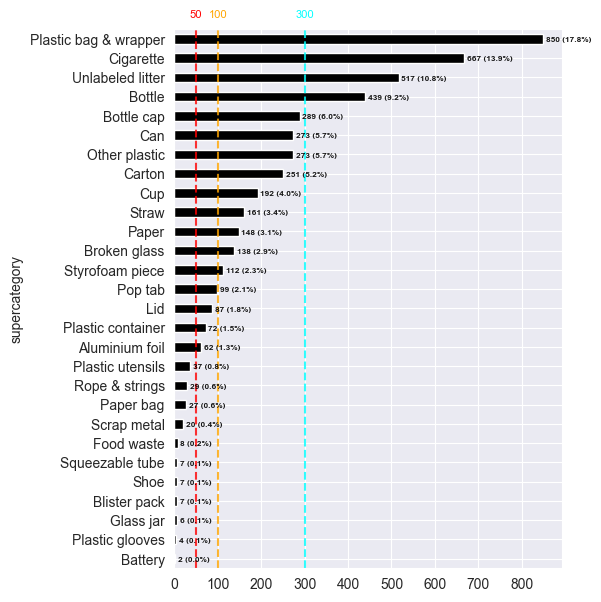

In [19]:
fig, ax = plt.subplots(figsize=(5, 7))
supercategory_counts = taco_meta_df['supercategory'].value_counts(ascending=True)

supercategory_counts.plot(kind='barh', ax=ax, color='black')
# add % to the plot
for i, v in enumerate(supercategory_counts):
    ax.text(v + 6, i - 0.15, f"{v} ({v / supercategory_counts.sum():.1%})", color='black', fontweight='bold', fontsize=6,
            alpha=0.9)

for xc, color in zip([50, 100, 300], ['r', 'orange', 'cyan']):
    ax.text(xc, n_supercategory, str(xc), fontsize=8, color=color, va="bottom", ha="center")
    plt.axvline(x=xc, color=color, linestyle='--', alpha=0.8)

plt.show()

### Presence of "cat_name == 'Plastified paper bag'

On remarque qu'il n'y a aucun objet de type "Plastified paper bag" dans le dataset.
Pourtant, cette catégorie est présente, avec un id unique : 35

In [20]:
# query example with cat_id == 35
taco_meta_df.query("cat_id == 35")

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area


In [21]:
taco_meta_df.query("cat_name == 'Plastified paper bag'")

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area


### Export mapping cat_name & supercategory

In [22]:
print(annotations_dfs_dict.keys())
annotations_dfs_dict["categories"]

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])


,supercategory,id,name
0,Aluminium foil,0,Aluminium foil
1,Battery,1,Battery
2,Blister pack,2,Aluminium blister pack
3,Blister pack,3,Carded blister pack
4,Bottle,4,Other plastic bottle
5,Bottle,5,Clear plastic bottle
6,Bottle,6,Glass bottle
7,Bottle cap,7,Plastic bottle cap
8,Bottle cap,8,Metal bottle cap
9,Broken glass,9,Broken glass


 cat_id -> cat_name

In [23]:
cat_idx_2_cat_name = {row['id']: row['name'] for idx, row in annotations_dfs_dict["categories"].iterrows()}
cat_idx_2_cat_name

{0: 'Aluminium foil',
 1: 'Battery',
 2: 'Aluminium blister pack',
 3: 'Carded blister pack',
 4: 'Other plastic bottle',
 5: 'Clear plastic bottle',
 6: 'Glass bottle',
 7: 'Plastic bottle cap',
 8: 'Metal bottle cap',
 9: 'Broken glass',
 10: 'Food Can',
 11: 'Aerosol',
 12: 'Drink can',
 13: 'Toilet tube',
 14: 'Other carton',
 15: 'Egg carton',
 16: 'Drink carton',
 17: 'Corrugated carton',
 18: 'Meal carton',
 19: 'Pizza box',
 20: 'Paper cup',
 21: 'Disposable plastic cup',
 22: 'Foam cup',
 23: 'Glass cup',
 24: 'Other plastic cup',
 25: 'Food waste',
 26: 'Glass jar',
 27: 'Plastic lid',
 28: 'Metal lid',
 29: 'Other plastic',
 30: 'Magazine paper',
 31: 'Tissues',
 32: 'Wrapping paper',
 33: 'Normal paper',
 34: 'Paper bag',
 35: 'Plastified paper bag',
 36: 'Plastic film',
 37: 'Six pack rings',
 38: 'Garbage bag',
 39: 'Other plastic wrapper',
 40: 'Single-use carrier bag',
 41: 'Polypropylene bag',
 42: 'Crisp packet',
 43: 'Spread tub',
 44: 'Tupperware',
 45: 'Disposable 

In [35]:
from config import CATNAME_2_EMOJI
print(CATNAME_2_EMOJI)

{'Aluminium foil': '🔩', 'Battery': '🔋', 'Aluminium blister pack': '💊', 'Carded blister pack': '💊🃏', 'Other plastic bottle': '🧴', 'Clear plastic bottle': '🧴', 'Glass bottle': '🍾', 'Plastic bottle cap': '🔘', 'Metal bottle cap': '🔘', 'Broken glass': '🔨', 'Food Can': '🥫', 'Aerosol': '🎨', 'Drink can': '🥤', 'Toilet tube': '🧻', 'Other carton': '📦', 'Egg carton': '🥚📦', 'Drink carton': '🧃', 'Corrugated carton': '📦', 'Meal carton': '🍱', 'Pizza box': '🍕📦', 'Paper cup': '🥤', 'Disposable plastic cup': '🥤', 'Foam cup': '☕', 'Glass cup': '🥃', 'Other plastic cup': '🥤', 'Food waste': '🍽️🗑️', 'Glass jar': '🍯', 'Plastic lid': '🔘', 'Metal lid': '🔘', 'Other plastic': '♻️', 'Magazine paper': '📰', 'Tissues': '🤧', 'Wrapping paper': '🎁', 'Normal paper': '📄', 'Paper bag': '🛍️', 'Plastified paper bag': '🛍️', 'Plastic film': '♻️', 'Six pack rings': '🍺', 'Garbage bag': '🗑️', 'Other plastic wrapper': '♻️', 'Single-use carrier bag': '🛍️', 'Polypropylene bag': '♻️', 'Crisp packet': '🍿', 'Spread tub': '🧈', 'Tupperware

cat_id -> supercategory

In [24]:
cat_idx_2_supercat_name = {row['id']: row['supercategory'] for idx, row in annotations_dfs_dict["categories"].iterrows()}
cat_idx_2_supercat_name

{0: 'Aluminium foil',
 1: 'Battery',
 2: 'Blister pack',
 3: 'Blister pack',
 4: 'Bottle',
 5: 'Bottle',
 6: 'Bottle',
 7: 'Bottle cap',
 8: 'Bottle cap',
 9: 'Broken glass',
 10: 'Can',
 11: 'Can',
 12: 'Can',
 13: 'Carton',
 14: 'Carton',
 15: 'Carton',
 16: 'Carton',
 17: 'Carton',
 18: 'Carton',
 19: 'Carton',
 20: 'Cup',
 21: 'Cup',
 22: 'Cup',
 23: 'Cup',
 24: 'Cup',
 25: 'Food waste',
 26: 'Glass jar',
 27: 'Lid',
 28: 'Lid',
 29: 'Other plastic',
 30: 'Paper',
 31: 'Paper',
 32: 'Paper',
 33: 'Paper',
 34: 'Paper bag',
 35: 'Paper bag',
 36: 'Plastic bag & wrapper',
 37: 'Plastic bag & wrapper',
 38: 'Plastic bag & wrapper',
 39: 'Plastic bag & wrapper',
 40: 'Plastic bag & wrapper',
 41: 'Plastic bag & wrapper',
 42: 'Plastic bag & wrapper',
 43: 'Plastic container',
 44: 'Plastic container',
 45: 'Plastic container',
 46: 'Plastic container',
 47: 'Plastic container',
 48: 'Plastic glooves',
 49: 'Plastic utensils',
 50: 'Pop tab',
 51: 'Rope & strings',
 52: 'Scrap metal',
 

supercat_idx -> supercategory_name

In [25]:
supercat_idx_2_supercat_name = {i : supercat_name for i, supercat_name in enumerate(annotations_dfs_dict["categories"]['supercategory'].unique().tolist())}
supercat_idx_2_supercat_name 

{0: 'Aluminium foil',
 1: 'Battery',
 2: 'Blister pack',
 3: 'Bottle',
 4: 'Bottle cap',
 5: 'Broken glass',
 6: 'Can',
 7: 'Carton',
 8: 'Cup',
 9: 'Food waste',
 10: 'Glass jar',
 11: 'Lid',
 12: 'Other plastic',
 13: 'Paper',
 14: 'Paper bag',
 15: 'Plastic bag & wrapper',
 16: 'Plastic container',
 17: 'Plastic glooves',
 18: 'Plastic utensils',
 19: 'Pop tab',
 20: 'Rope & strings',
 21: 'Scrap metal',
 22: 'Shoe',
 23: 'Squeezable tube',
 24: 'Straw',
 25: 'Styrofoam piece',
 26: 'Unlabeled litter',
 27: 'Cigarette'}

### Linked Graph

In [26]:
print(annotations_dfs_dict.keys())
annotations_dfs_dict["categories"]

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])


,supercategory,id,name
0,Aluminium foil,0,Aluminium foil
1,Battery,1,Battery
2,Blister pack,2,Aluminium blister pack
3,Blister pack,3,Carded blister pack
4,Bottle,4,Other plastic bottle
5,Bottle,5,Clear plastic bottle
6,Bottle,6,Glass bottle
7,Bottle cap,7,Plastic bottle cap
8,Bottle cap,8,Metal bottle cap
9,Broken glass,9,Broken glass


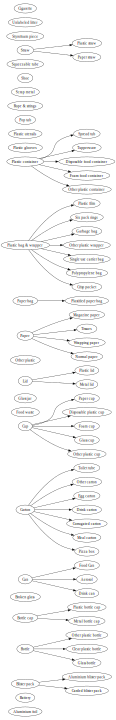

In [38]:
from graphviz import Digraph
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# Note: graphviz may require more than pip installation due to path issue: e.g. brew install graphviz for mac

#g = Digraph('G', filename='hello.gv')
dot = Digraph('Dataset graph', filename='outputs/categories_graph.gv')
dot.attr(rankdir='LR', size='8,10')

for i,cat_it in annotations_dfs_dict["categories"].iterrows():
    dot.node(f'{cat_it["name"]}')
    if cat_it['name']==cat_it['supercategory']:
        dot.node(cat_it['supercategory'])
    else:
        dot.edge(cat_it['supercategory'], cat_it['name'])


dot.save()
dot.view()
dot

## Width & Height Distribution

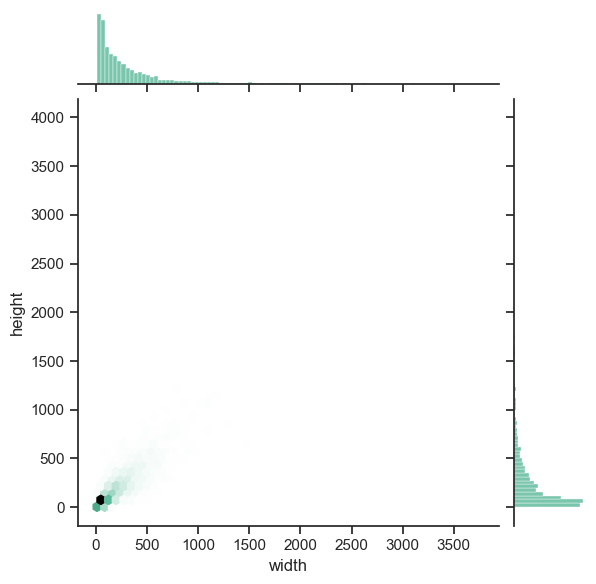

In [49]:
sns.set_theme(style="ticks")
sns.jointplot(x="width", y="height", data=taco_meta_df, kind="hex", color="#4CB391")

## Aera

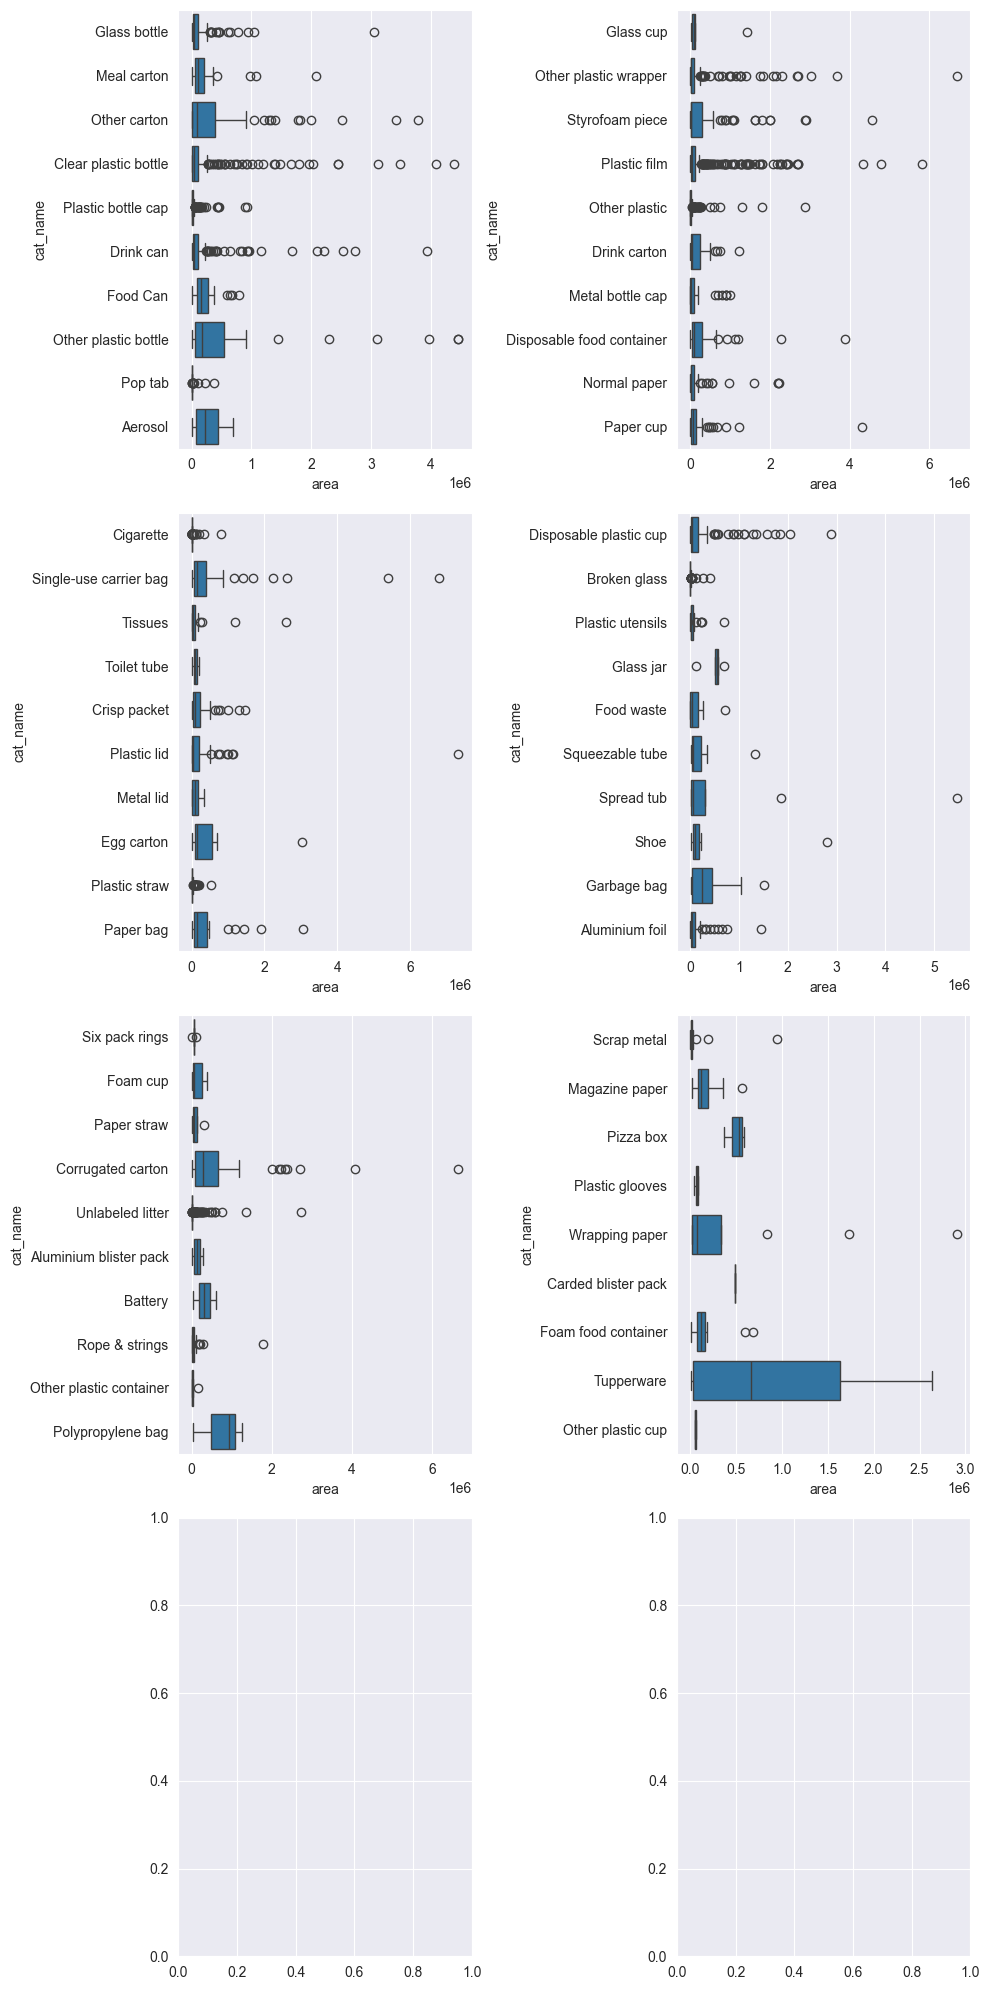

In [44]:
# list to [[], [], []] (chunk)
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

# chunk cat_name
cat_names_group : list = list(chunk_list(taco_meta_df['cat_name'].unique().tolist(), 10))
# area boxplot by category
# multiple plot
n_cols = 2
n_rows = len(cat_names_group) // n_cols + 1

# create figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 20))
# flatten axes
axes = axes.flatten()
# loop over cat_name
for i, cat_names in enumerate(cat_names_group):
    df = taco_meta_df[taco_meta_df['cat_name'].isin(cat_names)]
    sns.boxplot(x="area", y="cat_name", data=df, ax=axes[i])
    axes[i].set_xlabel("area")
    axes[i].set_ylabel("cat_name")
    
plt.tight_layout()
plt.show()



### Il est question de comprendre la variété des tailles d'images

Bouteille en verre 🍾
Carton de repas 🥡
Autre carton 📦
Bouteille en plastique transparent 🧴
Bouchon de bouteille en plastique 🚮
Canette de boisson 🥫
Boîte de conserve 🛢
Autre bouteille en plastique 🧴
Ouvre-canette 🥫
Aérosol 🎨
Verre en verre 🥃
Autre emballage plastique 🍬
Morceau de polystyrène 🍽
Film plastique 🎞
Autre plastique 🚮
Carton à boisson 🧃
Capsule en métal 🍾
Conteneur alimentaire jetable 🍱
Papier ordinaire 📄
Gobelet en papier 🥤
Cigarette 🚬
Sac à usage unique 🛍
Mouchoirs 🤧
Tube de papier toilette 🧻
Paquet de chips 🍟
Couvercle en plastique 🥡
Couvercle en métal 🥫
Boîte à œufs 🥚
Paille en plastique 🥤
Sac en papier 🛍
Gobelet plastique jetable 🥤
Verre brisé 🔨